Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9858 - loss: 0.1823 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 3.5474e-04
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 2.9411e-04 - val_accuracy: 1.0000 - val_loss: 1.4669e-04
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.2605e-04 - val_accuracy: 1.0000 - val_loss: 7.6953e-05
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 6.9320e-05 - val_accuracy: 1.0000 - val_loss: 4.5656e-05
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.2486e-05 - val_accuracy: 1.0000 - val_loss: 2.9139e-05
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.7948e-05 - val_accuracy: 1.0000 - val_loss: 1.9488e-05
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 

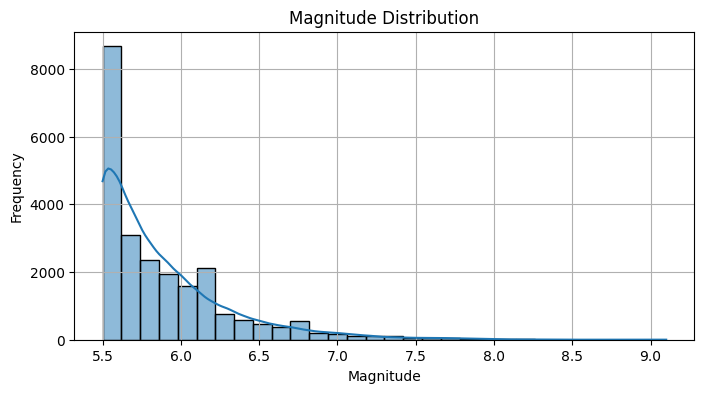

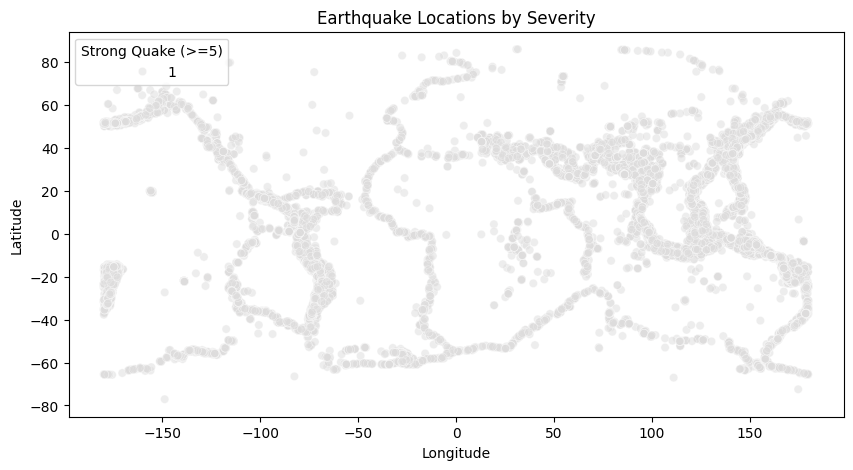

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("/content/database.csv")

# Step 1: Combine and convert 'Date' + 'Time' to Unix timestamp
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df['Timestamp'] = df['Datetime'].astype(np.int64) // 10**9
df.dropna(subset=['Timestamp', 'Latitude', 'Longitude', 'Depth', 'Magnitude'], inplace=True)

# Step 2: Feature selection
features = ['Latitude', 'Longitude', 'Depth', 'Magnitude']
X = df[features]

# Step 3: Create binary labels: 1 if Magnitude >= 5, else 0
df['Label'] = (df['Magnitude'] >= 5.0).astype(int)
y = to_categorical(df['Label'], num_classes=2)

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Build model
model = Sequential([
    Dense(16, input_shape=(4,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 8: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.3f}")

# Step 9: Visualization
plt.figure(figsize=(8, 4))
sns.histplot(df['Magnitude'], bins=30, kde=True)
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Label', palette='coolwarm', alpha=0.5)
plt.title("Earthquake Locations by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Strong Quake (>=5)')
plt.show()
